In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from plots import *
from utility import *

In [2]:
d_sample = dict(color='#00B0F0',linestyle=':',marker="." ,label=get_display('ללא פקידות חוזרות'),alpha=0.8)
d_4_8_4 = dict(color='#0070C0',linestyle='dashed',marker=".",label=get_display('פקידות חוזרות (שיטת 4-8-4)'))
d_real = dict(color='r',linestyle='--', marker=".", label=get_display('במציאות'))


$\hat{p}_b \sim N(p_b,\frac{SD}{\sqrt{N}})$

$SD = \sqrt{p_b(1-p_b)}$

$N=80$

$p_b=0.15$


In [3]:
n=80
group_b =0.15
y_base_a =40
y_base_b = 80

start='01-01-2013'
end='12-10-2023'

times = pd.period_range(start=start, end=end, freq='M').to_timestamp()
t = len(times)
x =times[24:]
y_real = np.array([y_base_a* (1-group_b) + y_base_b*group_b]*len(times))

In [4]:
np.random.seed(0)
b_sample,y_sample =  rand_group_b(group_b, y_base_a,y_base_b, t)
y_484 = mean_4_8_4(pd.Series(y_sample)).to_numpy()

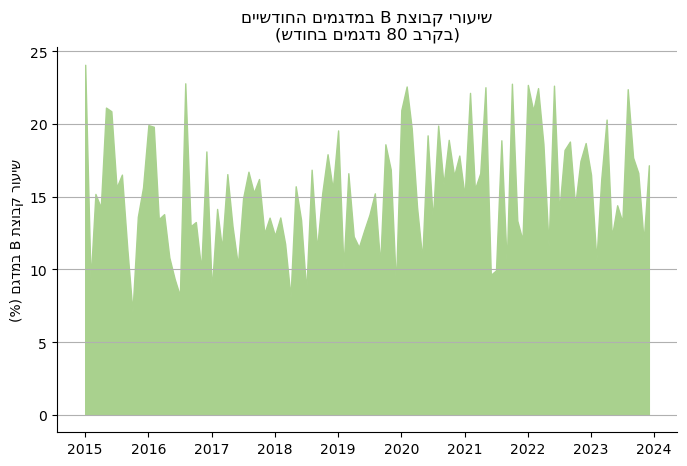

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,5), sharex=True, sharey=True)

ax.fill_between(x, b_sample[24:]*100,color ='#A9D18E')
ax.grid(axis = 'y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
title1 = get_display('שיעורי קבוצת B במדגמים החודשיים')
title2 = get_display('(בקרב 80 נדגמים בחודש)')
ax.set_ylabel(get_display('שיעור קבוצת B במדגם (%)'))
ax.set_title(title1 + '\n' +title2)
plt.show()

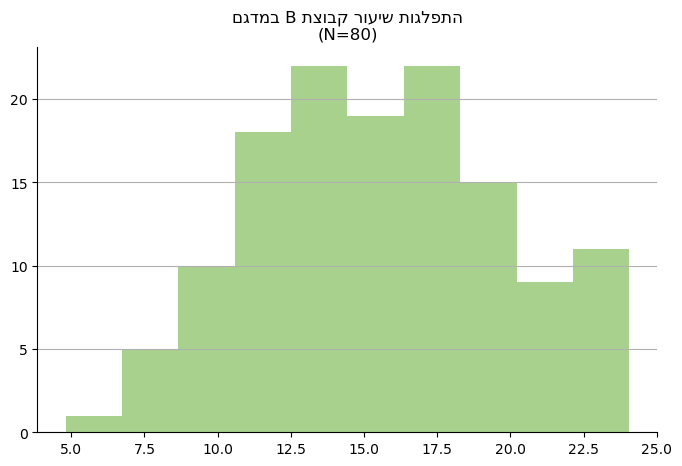

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,5), sharex=True, sharey=True)

ax.hist(b_sample*100,color ='#A9D18E')
ax.grid(axis = 'y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

title1 = get_display('התפלגות שיעור קבוצת B במדגם')
title2 = get_display('(N=80)')
ax.set_title(title1 + '\n' +title2)
plt.show()

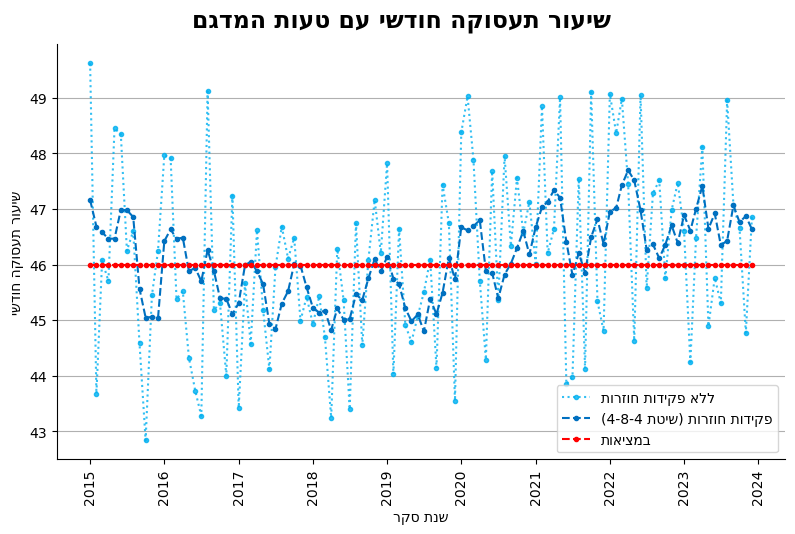

In [7]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

plot_sample_484(ax,x,
                y_sample[24:],y_484[24:], y_real[24:],
                d_sample,d_4_8_4, d_real)

plt.subplots_adjust(left=0.07, right=0.98, bottom=0.08, top=0.91, hspace=0.05, wspace=0.05)      
ax.set_xlabel(get_display('שנת סקר'))
ax.set_ylabel(get_display('שיעור תעסוקה חודשי'))
fig.suptitle(get_display('שיעור תעסוקה חודשי עם טעות המדגם'),fontsize=17,fontweight ="bold")
plt.legend(loc='best')

plt.show()

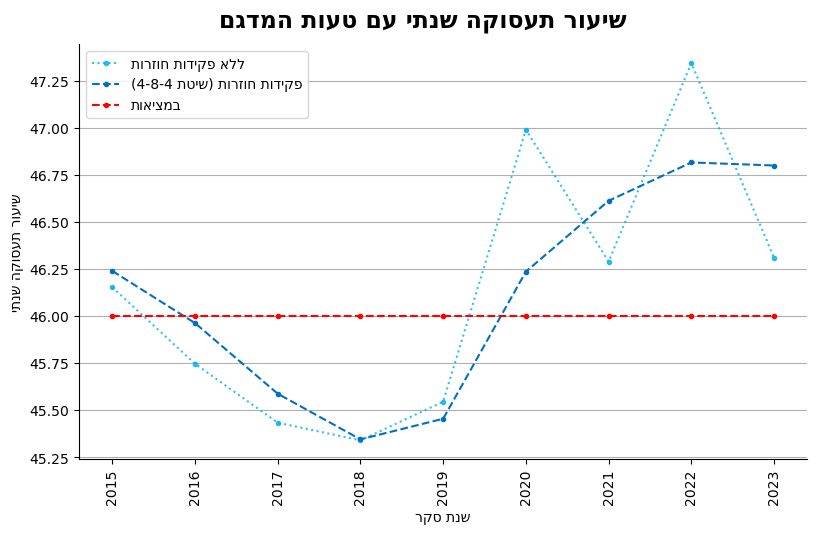

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
plot_sample_484_yearly(ax,x,
                y_sample[24:],y_484[24:], y_real[24:],
                d_sample,d_4_8_4, d_real)

      
plt.subplots_adjust(left=0.07, right=0.98, bottom=0.08, top=0.91, hspace=0.05, wspace=0.05)    
  
ax.set_xlabel(get_display('שנת סקר'))
ax.set_ylabel(get_display('שיעור תעסוקה שנתי'))
fig.suptitle(get_display('שיעור תעסוקה שנתי עם טעות המדגם'),fontsize=17,fontweight ="bold")
plt.legend(loc='best')

plt.show()

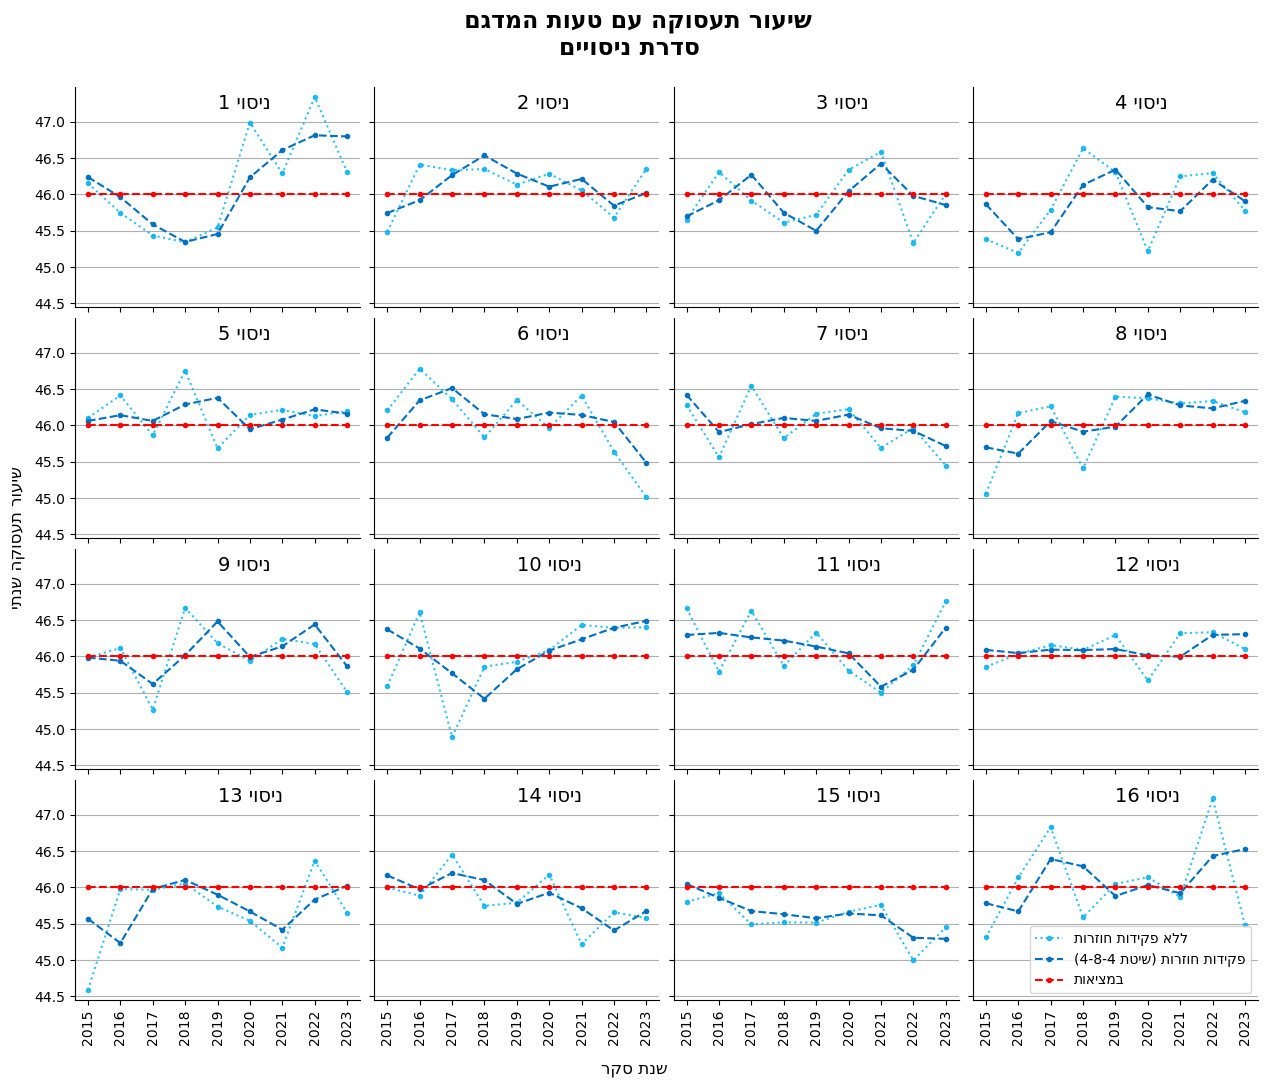

In [9]:
ncols = 4
nrows = 4

employment_real =y_base_a* (1-group_b) + y_base_b*group_b

start='01-01-2013'
end='12-31-2023'
times = pd.period_range(start=start, end=end, freq='M').to_timestamp()
t = len(times)
y_real = np.array([employment_real]*len(times))

fig, axs = plt.subplots(nrows,ncols,figsize=(13,11), sharex=True, sharey=True)
x =times[24:]
k=0
for i in range(nrows):
    for j in range(ncols):
        np.random.seed(k)
        
        _,y_sample =  rand_group_b(group_b, y_base_a,y_base_b, t)

        y_484 = mean_4_8_4(pd.Series(y_sample)).to_numpy()[24:]
        ax = axs[i, j]
                
        plot_sample_484_yearly(ax,x, y_sample[24:],y_484, y_real[24:],
                d_sample,d_4_8_4, d_real)
        
        k+= 1
        ax.text(0.5, 0.9,   str(k) +get_display(' ניסוי '), fontsize=14 ,transform=ax.transAxes)         

plt.subplots_adjust(left=0.07, right=0.98, bottom=0.08, top=0.91, hspace=0.05, wspace=0.05)    
  
fig.supxlabel(get_display('שנת סקר'))
fig.supylabel(get_display('שיעור תעסוקה שנתי'))
fig.suptitle(get_display('שיעור תעסוקה עם טעות המדגם \n סדרת ניסויים'),fontsize=17,fontweight ="bold")
plt.legend(loc='best')

plt.show()

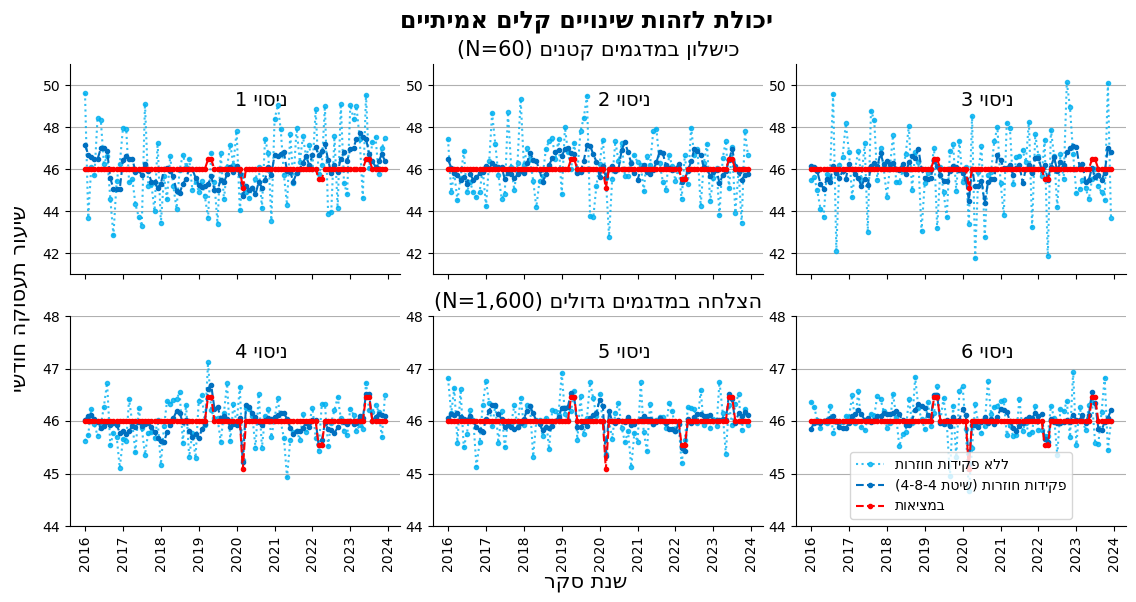

In [10]:
shock = np.ones(8*12)
shock[39:41] =1.01
shock[50] =0.98
shock[74:76] =0.99
shock[89:91] =1.01
x =times[36:]

start='01-01-2014'
end='12-10-2023'
times = pd.period_range(start=start, end=end, freq='M').to_timestamp()
t = len(times)
ncols = 3
nrows = 2


fig, axs = plt.subplots(nrows,ncols,figsize=(12,6),sharex='all')
x =times[24:]
y_real = np.array([y_base_a* (1-group_b) + y_base_b*group_b]*t)[24:]

k=0
for i in range(nrows):
    for j in range(ncols):
        if i == 0:
            n=80
        else:
            n=1500
        np.random.seed(k)
        _,y_sample =  rand_group_b(group_b, y_base_a,y_base_b,  t,n)
        y_484 = mean_4_8_4(pd.Series(y_sample)).to_numpy()[24:] 
        ax = axs[i, j]
        
        
        plot_sample_484(ax,x,
                y_sample[24:] *shock,y_484 *shock, y_real*shock,
                d_sample,d_4_8_4, d_real)

        
        k+= 1
        ax.text(0.5, 0.8,  str(k) +get_display(' ניסוי '), fontsize=14 ,transform=ax.transAxes)
        
        if i == 0:
            ax.set_ylim(41,51)
            if j==1:
                ax.set_title(get_display("כישלון במדגמים קטנים (N=60)"),fontsize=15)
        else:
            ax.set_ylim(44,48)
            if j==1:
                ax.set_title(get_display("הצלחה במדגמים גדולים (N=1,600)"),fontsize=15)


plt.legend(loc='lower center')
plt.subplots_adjust(left=0.07, right=0.95, bottom=0.12, top=0.89, hspace=0.2, wspace=0.1)    
fig.supxlabel(get_display('שנת סקר'),fontsize=15)
fig.supylabel(get_display('שיעור תעסוקה חודשי'),fontsize=15)
fig.suptitle(get_display('יכולת לזהות שינויים קלים אמיתיים'),fontsize=17,fontweight ="bold")

plt.show()
